In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas
import geopy
import geocoder
from geopy.geocoders import Nominatim
from datetime import datetime as dt
from datetime import date
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('final.csv',index_col = 0)
df['Hour'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%H')).astype('int64')
df['Month'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%m')).astype('int64')
df['Date'] = df['Time'].apply(lambda x : dt.strptime(x,'%Y-%m-%d %H:%M:%S').strftime('%d-%m-%Y'))
df['Day'] = df['Date'].apply(lambda x : list(map(int,x.split('-')))).apply(lambda x : date(x[2],x[1],x[0]).weekday())
df['Time'] = pd.to_datetime(df['Time'])
df = df.drop('Coordinates',axis = 1)

In [3]:
cities = list(set(list(df.City)))
len(cities)

119

In [4]:
locator = Nominatim(user_agent="jonas",timeout = 100)

coord = {}
for i,city in enumerate(cities):
    lc = locator.geocode(city)
    try:
        print(str(i+1)+'.'+ city + ' SUCCESS!')
        coord[city] = [lc.latitude,lc.longitude]
    except AttributeError:
        print(str(i+1)+'.'+city + ' DATA not available')

print(len(coord))   
coord

1.Gaya SUCCESS!
2.Muzaffarpur SUCCESS!
3.Chennai SUCCESS!
4.Ahmedabad SUCCESS!
5.Chandigarh SUCCESS!
6.Dharuhera SUCCESS!
7.Sagar SUCCESS!
8.Sirsa SUCCESS!
9.Gwalior SUCCESS!
10.Rupnagar SUCCESS!
11.Rajamahendravaram SUCCESS!
12.Ghaziabad SUCCESS!
13.Aurangabad SUCCESS!
14.Meerut SUCCESS!
15.Mumbai SUCCESS!
16.Satna SUCCESS!
17.Bhiwani SUCCESS!
18.Nagpur SUCCESS!
19.Sonipat SUCCESS!
20.Maihar SUCCESS!
21.Kollam SUCCESS!
22.Indore SUCCESS!
23.Eloor SUCCESS!
24.Manesar SUCCESS!
25.Kohima SUCCESS!
26.Narnaul SUCCESS!
27.Asansol SUCCESS!
28.Greater Noida SUCCESS!
29.Delhi SUCCESS!
30.Nandesari SUCCESS!
31.Kanpur SUCCESS!
32.Kalaburgi SUCCESS!
33.Patiala SUCCESS!
34.Kolkata SUCCESS!
35.Fatehabad SUCCESS!
36.Jalandhar SUCCESS!
37.Ludhiana SUCCESS!
38.Lucknow SUCCESS!
39.Solapur SUCCESS!
40.Kozhikode SUCCESS!
41.Chikkaballapur SUCCESS!
42.Jaipur SUCCESS!
43.Udaipur SUCCESS!
44.Nashik SUCCESS!
45.Faridabad SUCCESS!
46.Bulandshahr SUCCESS!
47.Ujjain SUCCESS!
48.Rohtak SUCCESS!
49.Amaravati SUCC

{'Gaya': [24.7964355, 85.0079563],
 'Muzaffarpur': [26.1486581, 85.34001282479626],
 'Chennai': [13.0801721, 80.2838331],
 'Ahmedabad': [23.0216238, 72.5797068],
 'Chandigarh': [30.72984395, 76.78414567016054],
 'Dharuhera': [28.2055216, 76.7953099],
 'Sagar': [23.80961225, 78.75911360578634],
 'Sirsa': [29.583333, 75.083333],
 'Gwalior': [26.2037247, 78.1573628],
 'Rupnagar': [31.09168085, 76.5272673916138],
 'Rajamahendravaram': [17.0050454, 81.7804732],
 'Ghaziabad': [28.711241, 77.4445372],
 'Aurangabad': [19.877263, 75.3390241],
 'Meerut': [28.916667, 77.683333],
 'Mumbai': [18.9387711, 72.8353355],
 'Satna': [24.5, 81.0],
 'Bhiwani': [28.7931703, 76.1391283],
 'Nagpur': [21.1498134, 79.0820556],
 'Sonipat': [29.0033144, 77.0167323],
 'Maihar': [24.260444, 80.7592749],
 'Kollam': [8.8879509, 76.5955013],
 'Indore': [22.7203616, 75.8681996],
 'Eloor': [10.06946315, 76.30727493919397],
 'Manesar': [28.32470955, 76.92637867182586],
 'Kohima': [25.75, 94.166667],
 'Narnaul': [27.99708

In [5]:
df['Coordinates'] = df.City.map(coord)

In [6]:
cols = ['City','Coordinates','Time','Month','Hour','Date','Day','NH3_min','NH3_avg','NH3_max']
df_1 = df[cols].copy()
df_1

,City,Coordinates,Time,Month,Hour,Date,Day,NH3_min,NH3_avg,NH3_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,2.000000,5.000000,7.000000
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,2.000000,3.000000,4.000000
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,NaN,NaN,NaN
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.000000,5.000000,8.000000
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.000000,4.000000,6.000000
...,...,...,...,...,...,...,...,...,...,...
32426,Vijayapura,"[16.666667, 75.916667]",2020-10-21 22:00:00,10,22,21-10-2020,2,1.000000,1.000000,1.000000
32427,Visakhapatnam,"[17.7231276, 83.3012842]",2020-10-21 22:00:00,10,22,21-10-2020,2,1.000000,2.000000,4.000000
32428,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-10-21 22:00:00,10,22,21-10-2020,2,2.000000,4.000000,6.000000
32429,Kolkata,"[22.54541245, 88.3567751581234]",2020-10-21 22:00:00,10,22,21-10-2020,2,2.428571,2.428571,2.571429


### Taking average for all cities over the period of data collection

In [7]:
df_1 = df_1[(df_1.Hour >= 7) & (df_1.Hour <= 22)]
df_1.head()

,City,Coordinates,Time,Month,Hour,Date,Day,NH3_min,NH3_avg,NH3_max
0,Yamunanagar,"[30.2112003, 77.28638972360895]",2020-09-22 14:00:00,9,14,22-09-2020,1,2.0,5.0,7.0
1,Karnal,"[29.6803266, 76.9896254]",2020-09-22 14:00:00,9,14,22-09-2020,1,2.0,3.0,4.0
2,Ahmedabad,"[23.0216238, 72.5797068]",2020-09-22 14:00:00,9,14,22-09-2020,1,NaN,NaN,NaN
3,Ajmer,"[26.4691, 74.639]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.0,5.0,8.0
4,Alwar,"[27.639077049999997, 76.6144524902045]",2020-09-22 14:00:00,9,14,22-09-2020,1,3.0,4.0,6.0


In [8]:
cities = sorted(list(set(df_1.City.to_list())))
print(len(cities))

119


In [9]:
list_dict = []
# 
for city in cities:
    dict_NH3 = {}
    dict_NH3['City'] = city
    dict_NH3['Max'] = df_1.loc[df_1.City == city]['NH3_max'].mean()
    dict_NH3['Avg'] = df_1.loc[df_1.City == city]['NH3_avg'].mean()
    dict_NH3['Min'] = df_1.loc[df_1.City == city]['NH3_min'].mean()
    dict_NH3['Coordinates'] = df_1.loc[df_1.City == city]['Coordinates'].values[0]
    list_dict.append(dict_NH3)
list_dict

[{'City': 'Agra',
  'Max': nan,
  'Avg': nan,
  'Min': nan,
  'Coordinates': [27.1752554, 78.0098161]},
 {'City': 'Ahmedabad',
  'Max': nan,
  'Avg': nan,
  'Min': nan,
  'Coordinates': [23.0216238, 72.5797068]},
 {'City': 'Ajmer',
  'Max': 8.922448979591836,
  'Avg': 5.7673469387755105,
  'Min': 3.9306122448979592,
  'Coordinates': [26.4691, 74.639]},
 {'City': 'Alwar',
  'Max': 6.289575289575289,
  'Avg': 3.189189189189189,
  'Min': 1.471042471042471,
  'Coordinates': [27.639077049999997, 76.6144524902045]},
 {'City': 'Amaravati',
  'Max': 3.939622641509434,
  'Avg': 2.9924528301886792,
  'Min': 2.3207547169811322,
  'Coordinates': [16.4998534, 81.3300812]},
 {'City': 'Ambala',
  'Max': 8.007547169811321,
  'Avg': 5.060377358490566,
  'Min': 1.8754716981132076,
  'Coordinates': [30.3843674, 76.770421]},
 {'City': 'Amritsar',
  'Max': 8.251012145748987,
  'Avg': 4.218623481781377,
  'Min': 2.882591093117409,
  'Coordinates': [31.6343083, 74.8736788]},
 {'City': 'Ankleshwar',
  'Max': 

In [10]:
df_avg = pd.DataFrame(list_dict)
df_avg = df_avg.round(2)
df_avg.head()

,City,Max,Avg,Min,Coordinates
0,Agra,NaN,NaN,NaN,"[27.1752554, 78.0098161]"
1,Ahmedabad,NaN,NaN,NaN,"[23.0216238, 72.5797068]"
2,Ajmer,8.92,5.77,3.93,"[26.4691, 74.639]"
3,Alwar,6.29,3.19,1.47,"[27.639077049999997, 76.6144524902045]"
4,Amaravati,3.94,2.99,2.32,"[16.4998534, 81.3300812]"


In [11]:
df_avg.describe()

,Max,Avg,Min
count,102.000000,102.000000,102.000000
mean,7.619902,5.034314,3.694412
std,6.002389,4.083620,3.101564
min,1.000000,1.000000,1.000000
25%,3.317500,2.015000,1.530000
50%,6.420000,3.960000,2.625000
75%,9.265000,6.090000,4.780000
max,34.610000,26.760000,18.770000


In [12]:
def Radius(df,val):
    df[val+'_rad'] = df[val]

In [13]:
def Create_Map():
    m3 = folium.Map(location = [23.2584857, 77.401989],zoom_start = 4.5,prefer_canvas=True)
    folium.TileLayer('Stamen Terrain').add_to(m3)
    folium.TileLayer('Stamen Toner').add_to(m3)
    folium.TileLayer('Stamen Water Color').add_to(m3)
    folium.TileLayer('cartodbpositron').add_to(m3)
    folium.TileLayer('cartodbdark_matter').add_to(m3)
    folium.LayerControl().add_to(m3)
    
    return m3

In [14]:
Radius(df_avg,'Avg')

In [15]:
NH3_map = Create_Map()

In [16]:
for city in df_avg.City :
    
    display = city +' '+ str(df_avg.loc[df_avg.City == city ,'Avg'].item())    

    if df_avg.loc[df_avg.City == city ,'Avg'].item() >= 6.09: 
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#FF5733',
                fill_color='#FF5733',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NH3_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 3.96:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EE8C31',
                fill_color='#EE8C31',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NH3_map)
        
    elif df_avg.loc[df_avg.City == city ,'Avg'].item() >= 2.01:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#EEE231',
                fill_color='#EEE231',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NH3_map)
        
    else:
        folium.CircleMarker(location=df_avg.loc[df_avg.City == city ,'Coordinates'].item(),color='#5FFF33',
                fill_color='#5FFF33',radius = df_avg.loc[df_avg.City == city ,'Avg_rad'].item(),
                            tooltip= display).add_to(NH3_map)

In [17]:
NH3_map

In [18]:
#NH3 levels
# excellent = 
# fine = 
# moderate = 
# poor = 

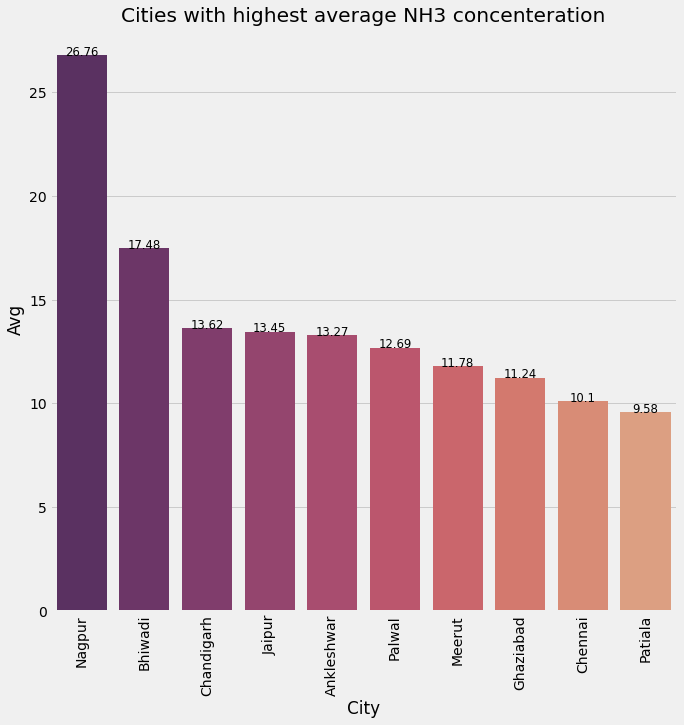

In [19]:
plt.figure(figsize=(10,10))
df_avg_top10 = df_avg.sort_values(by = 'Avg' ,ascending =False).head(10).reset_index()
pal = reversed(sns.color_palette('flare', len(df_avg_top10)))
g=sns.barplot(x='City',y='Avg',data=df_avg_top10, palette=pal)

for index, row in df_avg_top10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with highest average NH3 concenteration')
plt.xticks(rotation = 90)
plt.show()

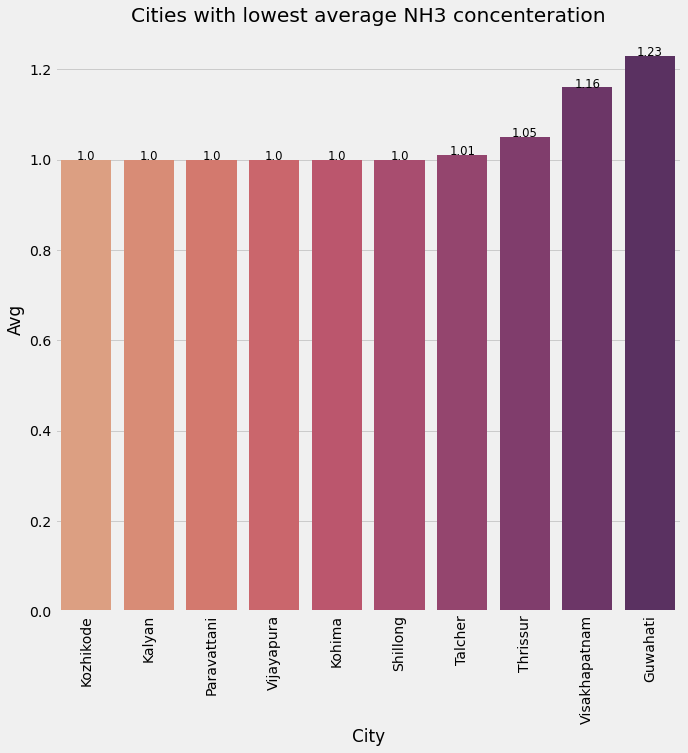

In [20]:
plt.figure(figsize=(10,10))
df_avg_last10 = df_avg.sort_values(by = 'Avg' ,ascending =False).dropna().tail(10).sort_values(by = 'Avg').reset_index()
g=sns.barplot(x='City',y='Avg',data=df_avg_last10, palette='flare')

for index, row in df_avg_last10.iterrows():
    g.text(row.name,row.Avg, round(row.Avg,2), color='black', ha="center",size = 'small')
    
plt.title('Cities with lowest average NH3 concenteration')
plt.xticks(rotation = 90)
plt.show()

## DELHI

In [21]:
df_2 = df[cols].copy()
delhi = df_2.loc[df_2.City == 'Delhi'].copy()
print(delhi.shape)
delhi = delhi.reset_index(drop = True)
delhi = delhi.round(2)
delhi.head()

(300, 10)


,City,Coordinates,Time,Month,Hour,Date,Day,NH3_min,NH3_avg,NH3_max
0,Delhi,"[28.6273928, 77.1716954]",2020-09-22 14:00:00,9,14,22-09-2020,1,5.07,6.72,9.17
1,Delhi,"[28.6273928, 77.1716954]",2020-09-22 16:00:00,9,16,22-09-2020,1,5.21,6.69,8.97
2,Delhi,"[28.6273928, 77.1716954]",2020-09-22 19:00:00,9,19,22-09-2020,1,5.03,6.62,8.79
3,Delhi,"[28.6273928, 77.1716954]",2020-09-22 22:00:00,9,22,22-09-2020,1,4.97,6.69,9.03
4,Delhi,"[28.6273928, 77.1716954]",2020-09-23 04:00:00,9,4,23-09-2020,2,4.79,6.71,9.07


In [22]:
delhi.describe()

,Month,Hour,Day,NH3_min,NH3_avg,NH3_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,6.466033,8.985967,12.299900
std,0.370287,5.458002,1.871871,0.964807,1.405125,2.294038
min,9.000000,0.000000,0.000000,4.740000,6.340000,7.970000
25%,10.000000,9.000000,1.000000,5.930000,7.960000,10.430000
50%,10.000000,13.000000,2.000000,6.180000,8.845000,12.260000
75%,10.000000,17.000000,4.000000,6.835000,9.807500,13.630000
max,10.000000,23.000000,6.000000,9.390000,12.390000,19.150000


### Taking only the time from 7 am to 10 pm

(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='NH3_avg'>

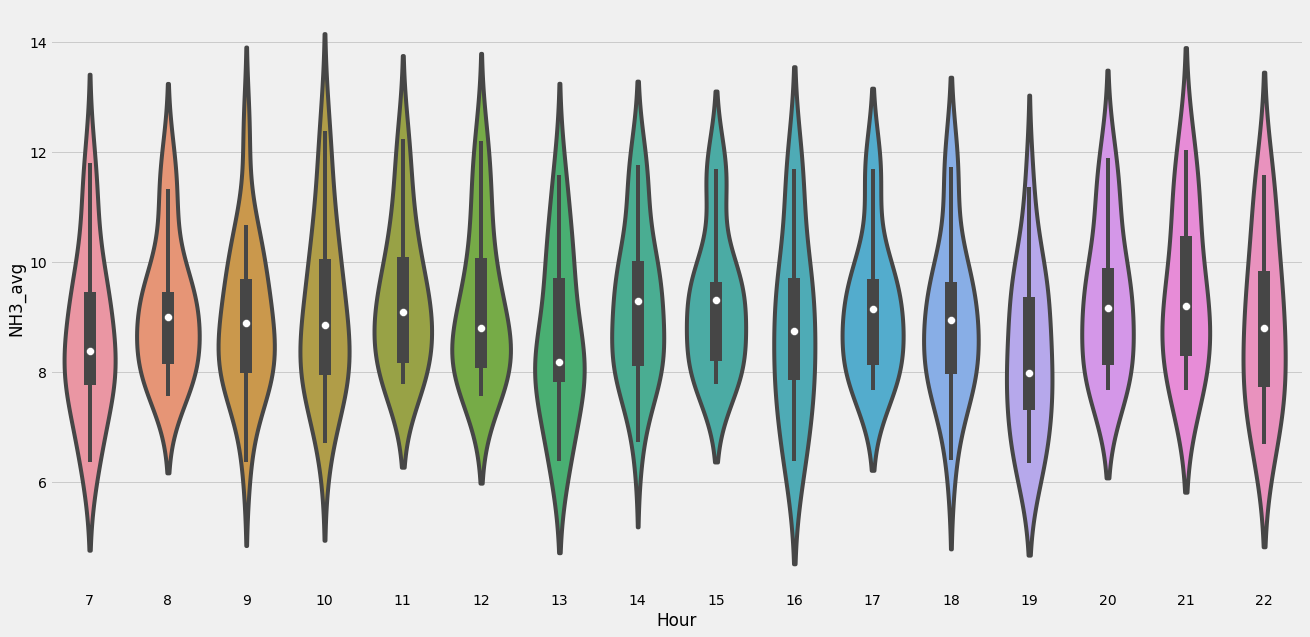

In [23]:
delhi = delhi[(delhi.Hour >= 7) & (delhi.Hour <= 22)]
print(delhi.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'NH3_avg',x = 'Hour',data = delhi)

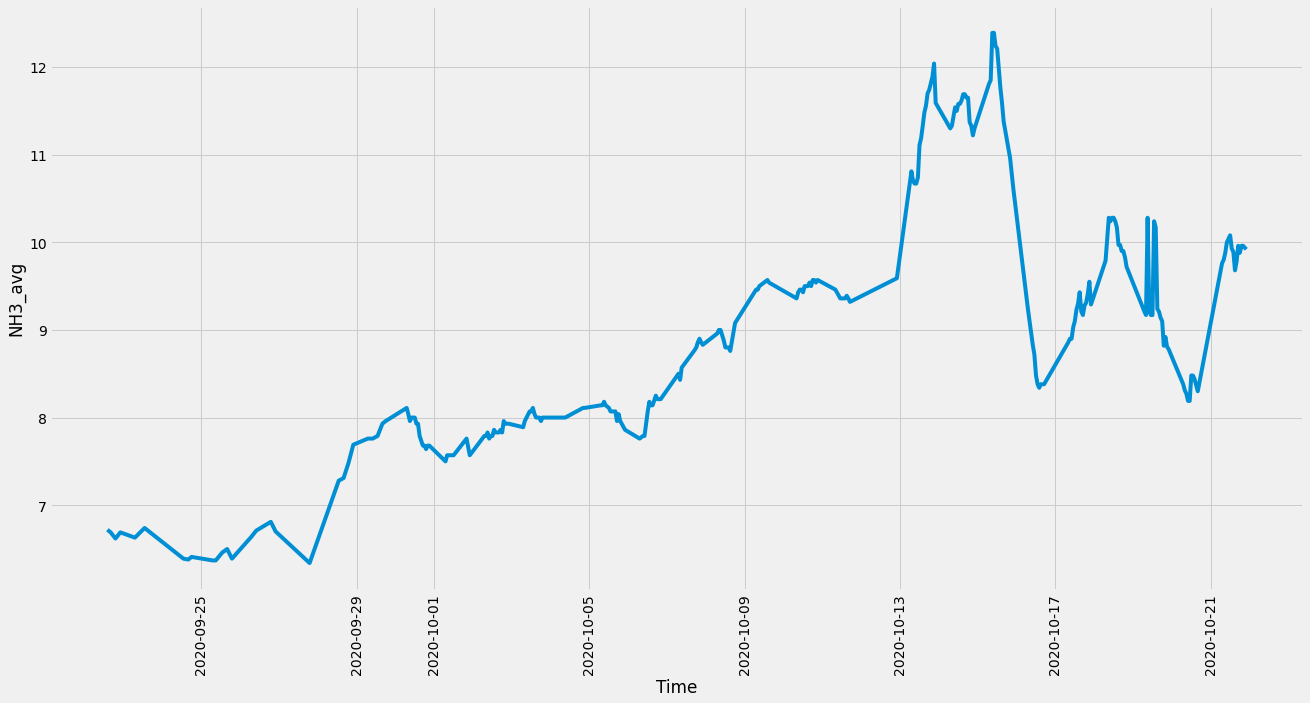

In [24]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NH3_avg',x = 'Time',data = delhi,)
plt.xticks(rotation = 90)
plt.show()

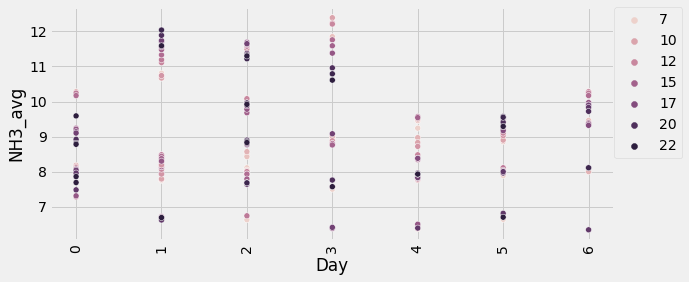

In [25]:
plt.figure(figsize = (9,4))
sns.scatterplot(y = 'NH3_avg',x = 'Day',hue = 'Hour',data = delhi) #color = ('#41cb89')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0)
plt.xticks(rotation = 90)
plt.show()

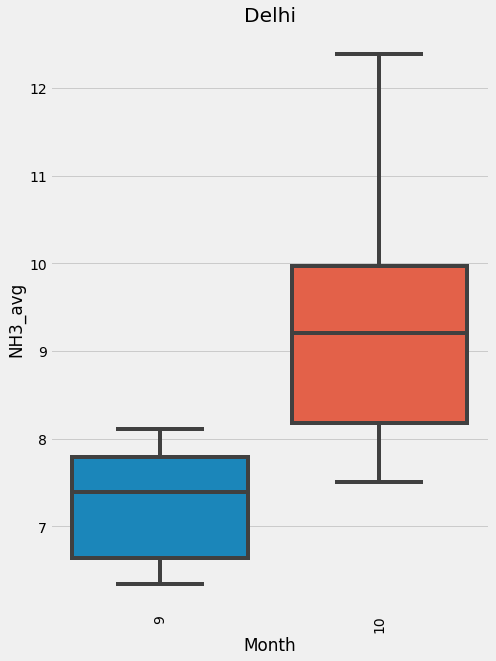

In [26]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'NH3_avg',x = 'Month',data = delhi)
plt.title('Delhi')
plt.xticks(rotation = 90)
plt.show()

In [27]:
delhi_sep = delhi[delhi.Month == 9].copy()
delhi_oct = delhi[delhi.Month == 10].copy()

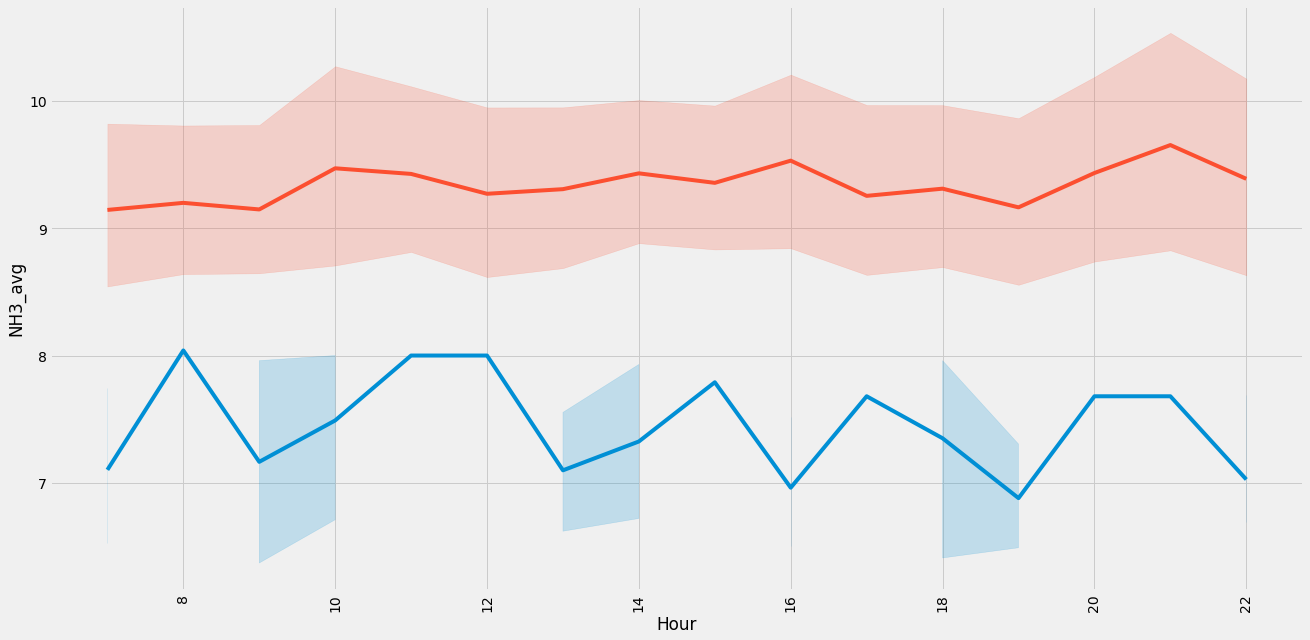

In [28]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NH3_avg',x = 'Hour',data = delhi_sep)
sns.lineplot(y = 'NH3_avg',x = 'Hour',data = delhi_oct)
plt.xticks(rotation = 90)
plt.show()

## Mumbai

In [29]:
mum = df_2.loc[df_2.City == 'Mumbai'].copy()
mum = mum.reset_index(drop = True)
mum = mum.round(2)
mum.head()

,City,Coordinates,Time,Month,Hour,Date,Day,NH3_min,NH3_avg,NH3_max
0,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 14:00:00,9,14,22-09-2020,1,4.00,5.29,7.86
1,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 16:00:00,9,16,22-09-2020,1,3.88,5.12,7.62
2,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 19:00:00,9,19,22-09-2020,1,3.75,5.12,7.50
3,Mumbai,"[18.9387711, 72.8353355]",2020-09-22 22:00:00,9,22,22-09-2020,1,3.86,5.00,6.86
4,Mumbai,"[18.9387711, 72.8353355]",2020-09-23 04:00:00,9,4,23-09-2020,2,3.57,5.43,7.71


In [30]:
mum.describe()

,Month,Hour,Day,NH3_min,NH3_avg,NH3_max
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,9.836667,13.053333,2.766667,3.826800,5.959733,9.573200
std,0.370287,5.458002,1.871871,1.596897,2.210030,3.398489
min,9.000000,0.000000,0.000000,2.220000,3.330000,4.670000
25%,10.000000,9.000000,1.000000,2.670000,4.290000,6.710000
50%,10.000000,13.000000,2.000000,3.250000,5.290000,9.000000
75%,10.000000,17.000000,4.000000,4.380000,6.710000,11.000000
max,10.000000,23.000000,6.000000,9.400000,12.600000,19.500000


(265, 10)


<AxesSubplot:xlabel='Hour', ylabel='NH3_avg'>

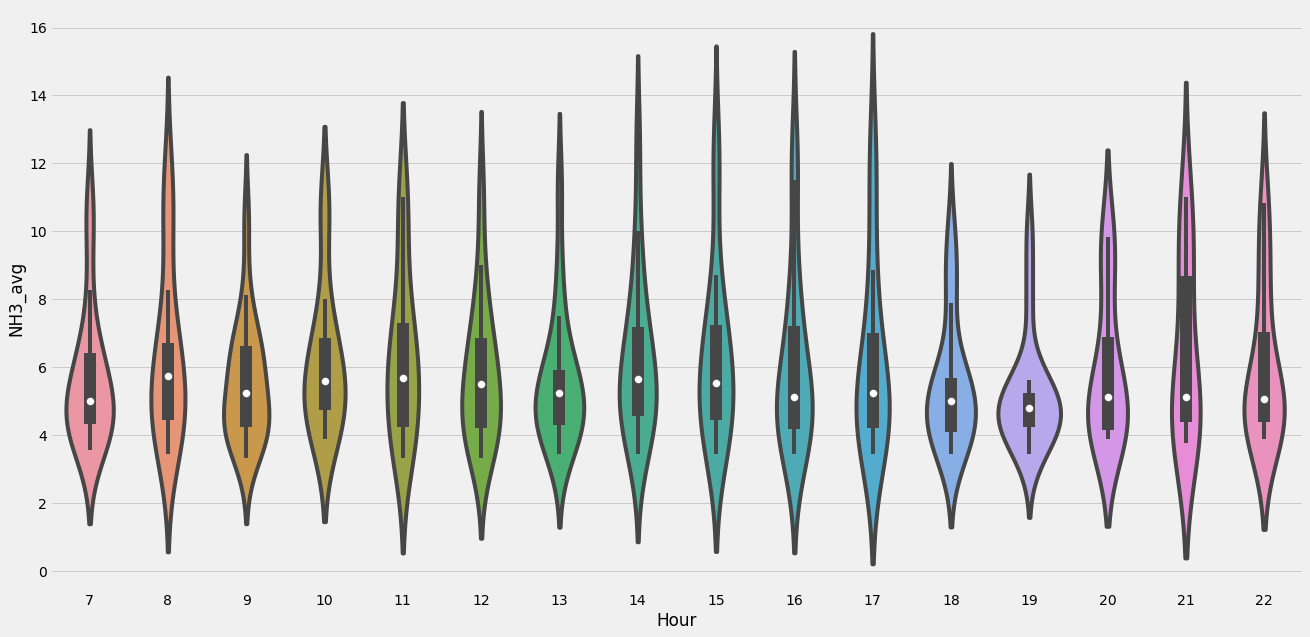

In [31]:
mum = mum[(mum.Hour >= 7) & (mum.Hour <= 22)]
print(mum.shape)
plt.figure(figsize = (20,10))
sns.violinplot(y = 'NH3_avg',x = 'Hour',data = mum)

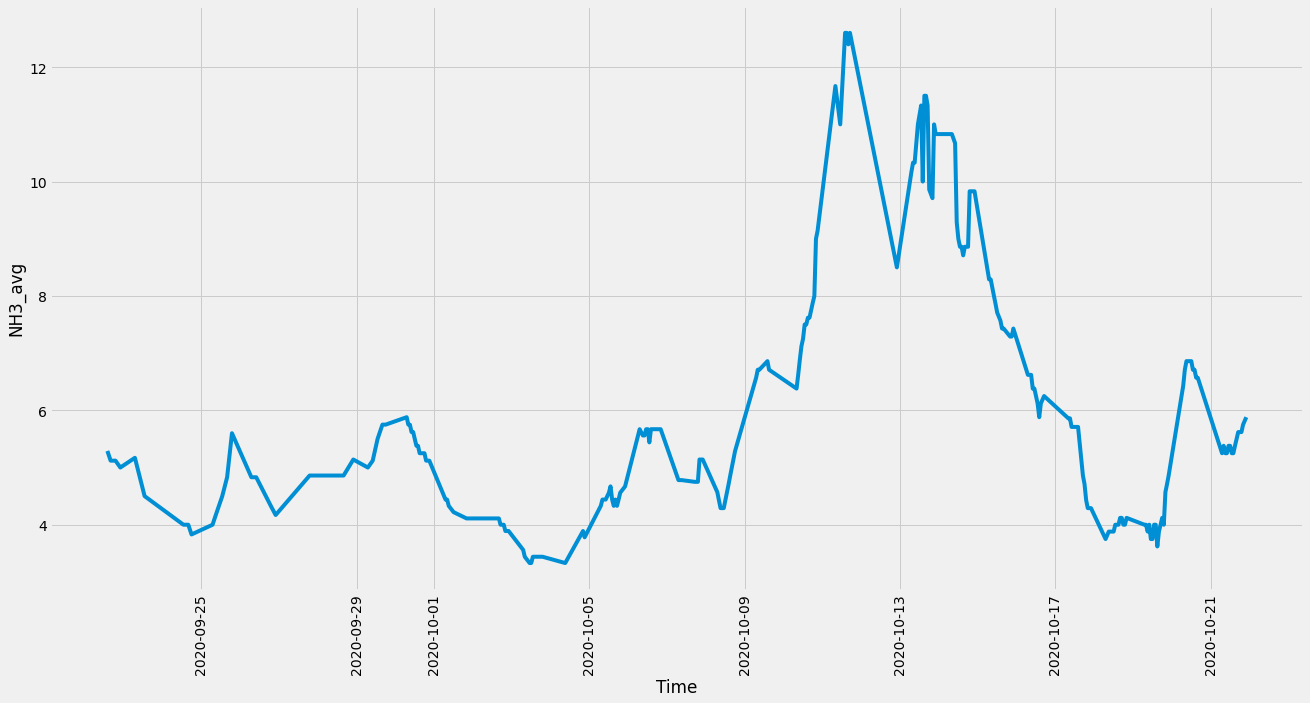

In [32]:
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NH3_avg',x = 'Time',data = mum)
plt.xticks(rotation = 90)
plt.show()

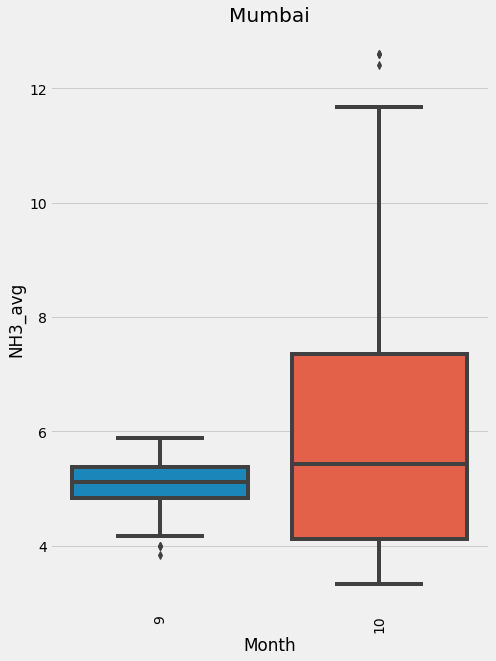

In [33]:
plt.figure(figsize = (7,10))
sns.boxplot(y = 'NH3_avg',x = 'Month',data = mum)
plt.title('Mumbai')
plt.xticks(rotation = 90)
plt.show()

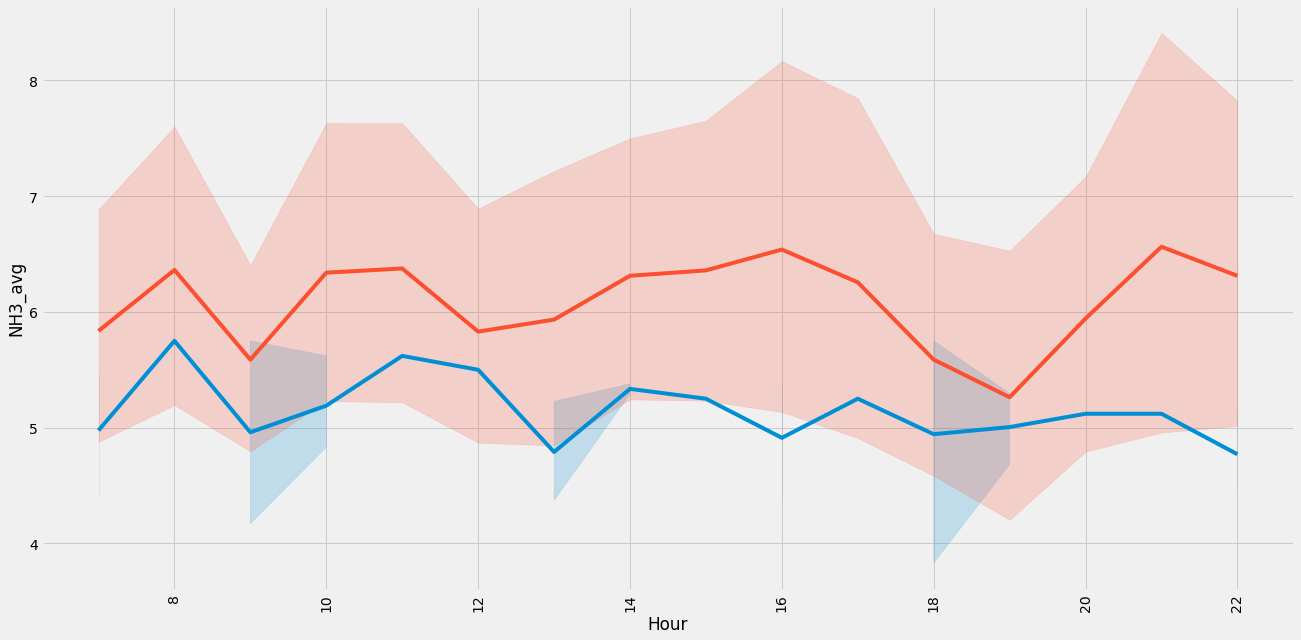

In [34]:
mum_sep = mum[mum.Month == 9].copy()
mum_oct = mum[mum.Month == 10].copy()
plt.figure(figsize = (20,10))
sns.lineplot(y = 'NH3_avg',x = 'Hour',data = mum_sep)
sns.lineplot(y = 'NH3_avg',x = 'Hour',data = mum_oct)
plt.xticks(rotation = 90)
plt.show()